## Anomaly Detection Project
### Murphy and Applegate, Florence Cohort, 2021_07_22
#### First Draft Final Notebook

In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

from env import host, user, password
import acquire
import prepare
import explore

## Project Planning

## Executive Summary

## Data Acquisition

In [2]:
# Bring the data in
df = acquire.get_cohort_curr_data()

In [3]:
# What does it look like?
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847330 entries, 0 to 847329
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        847330 non-null  object 
 1   time        847330 non-null  object 
 2   path        847329 non-null  object 
 3   user_id     847330 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          847330 non-null  object 
 6   id          847330 non-null  int64  
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       float64
 14  program_id  847330 non-null  int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 103.4+ MB


### Data Acquisition Key Findings, Takeaways, & Next Steps:
- Initial data set is 847_330 rows, by 15 columns
- One null in path, and entire null column 'deleted_at'
- Data Preparation To-Do:
    - Concatenate 'date' and 'time', convert to datetime, and reset as index.
    - Convert all time-bound variables to datetime format
    - Drop unnecessary columns
    - Drop null values

## Data Preparation

In [5]:
# initial_prep function takes care of the Data Preparation To-Do List
df = prepare.initial_prep(df)

In [6]:
# What does it look like now?
df.head()

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program
dt,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,full_stack_php
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,full_stack_php
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,full_stack_php
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,full_stack_php
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847329 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   endpoint    847329 non-null  object        
 1   user_id     847329 non-null  int64         
 2   cohort_id   847329 non-null  float64       
 3   ip          847329 non-null  object        
 4   id          847329 non-null  int64         
 5   cohort      847329 non-null  object        
 6   slack       847329 non-null  object        
 7   start_date  847329 non-null  datetime64[ns]
 8   end_date    847329 non-null  datetime64[ns]
 9   created_at  847329 non-null  datetime64[ns]
 10  updated_at  847329 non-null  datetime64[ns]
 11  program_id  847329 non-null  int64         
 12  program     847329 non-null  object        
dtypes: datetime64[ns](4), float64(1), int64(3), object(5)
memory usage: 90.5+ MB


### Data Preparation Key Findings, Takeaways, & Next Steps:
- After initial_prep, data set is 847_329 rows, by 13 columns
- 'date' and 'time' have been concatenated, converted to datetime, and set as the index
- All timebound variables have been converted to datetime
- 'deleted_at' was dropped, since it only contained null values
- 'program' was added to give a name to each program_id

## Data Exploration

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [8]:
# split into four dataframes, one for each program
fsp, jv, ds, fep = explore.split_by_program(df)

### Full Stack Program

In [9]:
# uses our prep_one function to get data ready for exploration
cohort_df, cohort_list = explore.prep_one(fsp)

In [10]:
# uses our print_one function to visualize results
explore.print_one(cohort_df, cohort_list)

-----------------
cohort  endpoint    
Lassen  index.html      877
        javascript-i    233
        java-iii        224
Name: endpoint, dtype: int64
-----------------
-----------------
cohort  endpoint     
Arches  javascript-i     294
        html-css         215
        javascript-ii    204
Name: endpoint, dtype: int64
-----------------
-----------------
cohort   endpoint    
Olympic  javascript-i    128
         java-i           76
         jquery           71
Name: endpoint, dtype: int64
-----------------
-----------------
cohort  endpoint                                        
Kings   index.html                                          84
        content/laravel/intro                               83
        content/laravel/intro/application-structure.html    63
Name: endpoint, dtype: int64
-----------------
-----------------
cohort   endpoint
Hampton  java-iii    57
         appendix    55
         java-i      46
Name: endpoint, dtype: int64
-----------------
----------------

#### Full Stack Program Key Findings
- java-i appears to be the most frequent lesson

### Java Program

In [11]:
# uses our prep_one function to get data ready for exploration
cohort_df, cohort_list = explore.prep_one(jv)

In [12]:
# uses our print_one function to visualize results
explore.print_one(cohort_df, cohort_list)

-----------------
cohort  endpoint    
Staff   javascript-i    1817
        spring          1403
        java-iii        1393
Name: endpoint, dtype: int64
-----------------
-----------------
cohort  endpoint                
Ceres   search/search_index.json    1380
        javascript-i                1003
        toc                          911
Name: endpoint, dtype: int64
-----------------
-----------------
cohort  endpoint    
Zion    toc             1465
        javascript-i     897
        java-iii         753
Name: endpoint, dtype: int64
-----------------
-----------------
cohort   endpoint                
Jupiter  toc                         1866
         search/search_index.json     998
         javascript-i                 926
Name: endpoint, dtype: int64
-----------------
-----------------
cohort   endpoint                
Fortuna  toc                         1293
         search/search_index.json    1020
         java-iii                     786
Name: endpoint, dtype: int64
-

#### Java Program Key Findings
- javascript-i appears to be the most frequent lesson

### Data Science Program

In [13]:
# uses our prep_one function to get data ready for exploration
cohort_df, cohort_list = explore.prep_one(ds)

In [14]:
# uses our print_one function to visualize results
explore.print_one(cohort_df, cohort_list)

-----------------
cohort  endpoint                                
Darden  classification/overview                     1109
        classification/scale_features_or_not.svg     943
        sql/mysql-overview                           774
Name: endpoint, dtype: int64
-----------------
-----------------
cohort  endpoint                                
Bayes   1-fundamentals/modern-data-scientist.jpg    650
        1-fundamentals/AI-ML-DL-timeline.jpg        648
        1-fundamentals/1.1-intro-to-data-science    640
Name: endpoint, dtype: int64
-----------------
-----------------
cohort  endpoint                                
Curie   6-regression/1-overview                     595
        search/search_index.json                    538
        1-fundamentals/modern-data-scientist.jpg    467
Name: endpoint, dtype: int64
-----------------
-----------------
cohort  endpoint                                                     
Easley  classification/scale_features_or_not.svg               

#### Data Science Program Key Findings
- Fundamentals was the most occuring lesson among the cohorts

### Front End Program

In [15]:
# uses our prep_one function to get data ready for exploration
cohort_df, cohort_list = explore.prep_one(fep)

In [16]:
# uses our print_one function to visualize results
explore.print_one(cohort_df, cohort_list)

-----------------
cohort  endpoint                                   
Apollo  content/html-css                               2
        content/html-css/gitbook/images/favicon.ico    1
        content/html-css/introduction.html             1
Name: endpoint, dtype: int64
-----------------


#### Front End Program Key Findings:
- Content/html-css is the most occuring lesson

## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [17]:
# reacquire data
df = acquire.get_cohort_curr_data()

In [18]:
# Initial prep
df = prepare.initial_prep(df)

In [19]:
# split by program
df_1, df_2, df_3, df_4 = explore.q2_prep(df)

### Full Stack Program

In [20]:
# look at full stack
df_1 = explore.add_math(df_1)
df_1

,min_x,min_y,max_x,max_y,mean,sum,range,zscore
endpoint,,,,,,,,
java-iii/jsp-and-jstl,26,Arches,93,Olympic,56.0,224,67,2.7904


#### Full Stack Program Key Findings:
- We only wanted to look at values where the min number of page views > 10
    - The assumption is that anything < 10 means it's probably not class related
- There is one lesson where the range is greater than 50 ('java-iii/jsp-and-jstl' 
- Olympic views the lesson far more often than Arches

### Java Program

In [21]:
# look at java
df_2 = explore.add_math(df_2)
df_2

,min_x,min_y,max_x,max_y,mean,sum,range,zscore
endpoint,,,,,,,,
html-css/css-ii/bootstrap-grid-system,23,Andromeda,418,Zion,251.12,6278,395,17.4116


#### Java Program Key Findings & Takeaways:
- We only wanted to look at values where the min number of page views > 10
    - The assumption is that anything < 10 means it's probably not class related
- There is only 1 lesson where the range is greater than 50 ('html-css/css-ii/bootstrap-grid-system	')
- This shows Zion viewing the lesson far more often than Andromeda

### Data Science Program

In [22]:
# look at Data Science
df_3 = explore.add_math(df_3)
df_3

,min_x,min_y,max_x,max_y,mean,sum,range,zscore
endpoint,,,,,,,,
search/search_index.json,162,Bayes,664,Florence,440.6,2203,502,4.9759
classification/overview,35,Bayes,1109,Florence,357.0,1785,1074,4.0318
classification/scale_features_or_not.svg,28,Bayes,943,Florence,318.0,1590,915,3.5913
fundamentals/AI-ML-DL-timeline.jpg,24,Bayes,624,Florence,288.6,1443,600,3.2593
fundamentals/modern-data-scientist.jpg,24,Bayes,627,Florence,287.6,1438,603,3.2480
sql/mysql-overview,27,Bayes,774,Florence,284.8,1424,747,3.2164
fundamentals/intro-to-data-science,25,Bayes,615,Florence,282.6,1413,590,3.1915


#### Data Science Program Key Findings & Takeaways:
- We only wanted to look at values where the min number of page views > 10
    - The assumption is that anything < 10 means it's probably not class related
- There countless lessons where various cohorts ('Florence, Easley, Darden') outviewed Bayes
- Some evidence to suggest positive relationship between cohort dates attended and page views

### Front End Program

In [23]:
# look at Front End
explore.add_math(df_4)

,min_x,min_y,max_x,max_y,mean,sum,range,zscore
endpoint,,,,,,,,


#### Front End Program Key Findings & Takeaways:
- We only wanted to look at values where the min number of page views > 10
    - The assumption is that anything < 10 means it's probably not class related
- No values showed up (not much data for this program)
- Appears to only have been 1 cohort, for a very brief period of time

## 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [24]:
# reacquire data
df = acquire.get_cohort_curr_data()

In [25]:
# Initial prep
df = prepare.initial_prep(df)

In [26]:
# split into four dataframes, one for each program
fsp, jv, ds, fep = explore.split_by_program(df)

### Full Stack

In [27]:
#created a data frame which was filtered down to fsp program where users where between the start and stop dtae, no users though.
fsp = fsp[fsp.index <= fsp.end_date]
fsp = fsp[fsp.index > fsp.start_date]
fsp

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program
dt,,,,,,,,,,,,


#### Full Stack Program KEy Findings:
- Full stack program had no users which index was within start and end date

### Java

In [28]:
#creating df which is just the java and filtering to index date within the enddate startdate time frame.
jv = pd.DataFrame(df[df.program_id == 2])
jv = jv[jv.endpoint != '/']
jv = jv[jv.index <= jv.end_date]
jv = jv[jv.index > jv.start_date]

In [29]:
#creating df which contains probability of endpoints
ep_df = pd.DataFrame(jv.endpoint.value_counts(dropna=False)/jv.endpoint.count()).reset_index().\
                rename(index=str, columns={'index': 'endpoint', 'endpoint': 'ep_proba'})

In [30]:
#merging the prob df with the original
jv = jv.reset_index().merge(ep_df, on=['endpoint'], how='left').fillna(value=0).set_index('dt')
jv.head()

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,ep_proba
dt,,,,,,,,,,,,,,
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010161
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010384
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010161
2018-01-26 09:56:48,javascript-i/functions,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.011305
2018-01-26 09:56:59,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010384


In [31]:
#getting the probability of endpoints based on endpoint counts over entire df.
ep_probs = jv.groupby(['endpoint']).size().div(len(jv))
#creating df which contains the probability of endpoint given user and endpoint
ep_given_user_id_cohort = pd.DataFrame(jv.groupby(['user_id', 'endpoint']).\
                               size().div(len(jv)).\
                               div(ep_probs, 
                                   axis=0, 
                                   level='endpoint').reset_index().rename(index=str, columns={0: 'proba_uc_given_ep'}))

In [32]:
ep_given_user_id_cohort

,user_id,endpoint,proba_uc_given_ep
0,2,appendix,0.005432
1,2,appendix/angular/templating,0.019231
2,2,appendix/capstone-workbook,0.007803
3,2,appendix/documentation,0.007833
4,2,appendix/further-reading/java/intellij-tomcat-configuration,0.000713
...,...,...,...
74319,981,html-css,0.000743
74320,981,html-css/css-ii,0.000583
74321,981,html-css/css-ii/bootstrap-grid-system,0.003511
74322,981,html-css/css-ii/bootstrap-introduction,0.001145


In [33]:
# creating dataframe which is the count of user given endpoint
uid_ep_count = pd.DataFrame(jv.groupby(['user_id', 'endpoint'])['cohort_id'].\
                                count().reset_index().\
                                rename(index=str, 
                                       columns={'cohort_id': 'id_ep_count'}))

#merging the dfs's for future calculations
ep_user = ep_given_user_id_cohort.merge(uid_ep_count)

In [34]:
#merging created df to the original df
jv = jv.reset_index().merge(ep_user, on=['user_id', 'endpoint'], how='left').fillna(value=0).set_index('dt')

In [35]:
jv.cohort.value_counts()

Jupiter       34815
Ceres         34483
Zion          32435
Fortuna       31662
Voyageurs     30639
Ganymede      28010
Apex          27548
Hyperion      27250
Betelgeuse    25271
Europa        24691
Teddy         23968
Deimos        23918
Wrangell      23058
Ulysses       22951
Kalypso       22752
Xanadu        21890
Andromeda     20344
Yosemite      18427
Luna          16132
Marco         15698
Bash          15661
Neptune        6804
Sequoia        2008
Oberon         1541
Name: cohort, dtype: int64

In [36]:
jv.head(50)

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,ep_proba,proba_uc_given_ep,id_ep_count
dt,,,,,,,,,,,,,,,,
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010161,0.004625,25
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010384,0.004345,24
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010161,0.003330,18
2018-01-26 09:56:48,javascript-i/functions,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.011305,0.003991,24
2018-01-26 09:56:59,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010384,0.004345,24
2018-01-26 09:58:26,javascript-i/functions,4,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.011305,0.001164,7
2018-01-26 09:59:22,mkdocs/search_index.json,5,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.003038,0.030322,49
2018-01-26 10:00:02,javascript-i/introduction/working-with-data-types-operators-and-variables,6,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.012151,0.003094,20
2018-01-26 10:00:39,javascript-i,6,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.024859,0.003479,46


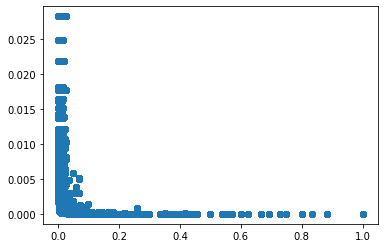

In [37]:
#plotted proba of endpoint vs proba end point given user given endpoint
plt.scatter(x= jv.proba_uc_given_ep, y = jv.ep_proba)

In [38]:
#filtering df to records within specified range
jv_= jv[(jv['proba_uc_given_ep'] > 0.5) & ((jv['ep_proba'] < 0.01))]
jv_

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,ep_proba,proba_uc_given_ep,id_ep_count
dt,,,,,,,,,,,,,,,,
2018-01-26 11:40:52,javascript/primitive-types,28,21.0,97.105.19.61,21,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2,java,0.000011,1.000000,6
2018-01-26 13:39:02,javascript/google-maps-api,38,21.0,97.105.19.61,21,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2,java,0.000002,1.000000,1
2018-01-26 18:07:07,javascript/primitive-types,28,21.0,97.105.19.61,21,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2,java,0.000011,1.000000,6
2018-01-26 18:42:23,javascript/primitive-types,28,21.0,97.105.19.61,21,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2,java,0.000011,1.000000,6
2018-01-26 19:41:19,javascript/primitive-types,28,21.0,97.105.19.61,21,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2,java,0.000011,1.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12 10:07:11,html-css/positioning,931,138.0,104.53.212.101,138,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2,java,0.000021,0.545455,6
2021-04-12 10:07:15,html-css/positioning,931,138.0,104.53.212.101,138,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2,java,0.000021,0.545455,6
2021-04-12 10:23:02,html-css/positioning,931,138.0,104.53.212.101,138,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2,java,0.000021,0.545455,6


In [39]:
jv_.endpoint.value_counts()

javascript-i/manipulating                       22
extra-challenges/mysql/mysql-extra-exercises    21
appendix/further-reading/java                   16
spring/form-model-binding                       16
fundamentals/controllers                        15
                                                ..
content/git/working-in-teams.html                1
hfdgafdja                                        1
mysql//functions                                 1
teams                                            1
content/jquery/simple-simon/create-game.html     1
Name: endpoint, Length: 328, dtype: int64

In [40]:
jv_[jv_.cohort == 'Andromeda'].head(50)

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,ep_proba,proba_uc_given_ep,id_ep_count
dt,,,,,,,,,,,,,,,,
2019-03-19 09:46:34,htmle-css/elements,385,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000002,1.000000,1
2019-03-19 09:49:30,html,387,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000002,1.000000,1
2019-03-19 09:49:37,html-css/elecments,373,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000002,1.000000,1
2019-03-22 11:40:13,examples,373,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000009,0.800000,4
2019-03-22 11:40:21,examples,373,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000009,0.800000,4
2019-03-22 11:40:41,examples,373,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000009,0.800000,4
2019-03-22 11:41:20,examples/css/..%2f,373,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000004,1.000000,2
2019-03-22 11:41:27,examples/css/..%2f,373,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000004,1.000000,2
2019-03-22 11:41:42,examples,373,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000009,0.800000,4


#### Java Program Key Findings:
- It appears that Andromeda contains a large amount of anomalies

### Data Science

In [41]:
#creating cohort and user lists
ds_cohort_list = list(ds.cohort.value_counts().index)
ds_user_list = list(ds.user_id.value_counts().index)

In [42]:
#creating df which contains is just current ds
ds = ds[ds.index <= ds.end_date]
ds = ds[ds.index > ds.start_date]

In [43]:
#creating df which contains the probabilty of endpoint
ep_df = pd.DataFrame(ds.endpoint.value_counts(dropna=False)/ds.endpoint.count()).reset_index().\
                rename(index=str, columns={'index': 'endpoint', 'endpoint': 'ep_proba'})

In [44]:
#merged the dataframe into the original to use for future calculations
ds = ds.reset_index().merge(ep_df, on=['endpoint'], how='left').fillna(value=0).set_index('dt')
ds.head()

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program,ep_proba
dt,,,,,,,,,,,,,
2019-08-20 09:39:58,/,466,34.0,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.075239
2019-08-20 09:39:59,/,467,34.0,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.075239
2019-08-20 09:39:59,/,468,34.0,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.075239
2019-08-20 09:40:02,/,469,34.0,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.075239
2019-08-20 09:40:08,/,470,34.0,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.075239


In [45]:
#calculate the probability of endpoint 
ep_probs = ds.groupby(['endpoint']).size().div(len(ds))
#creatign prob for user based on endpoint
ep_given_user_id_cohort = pd.DataFrame(ds.groupby(['user_id', 'endpoint']).\
                               size().div(len(ds)).\
                               div(ep_probs, 
                                   axis=0, 
                                   level='endpoint').reset_index().rename(index=str, columns={0: 'proba_uc_given_ep'}))

In [46]:
#getting the count of user based on endpoint
uid_ep_count = pd.DataFrame(ds.groupby(['user_id', 'endpoint'])['cohort_id'].\
                                count().reset_index().\
                                rename(index=str, 
                                       columns={'cohort_id': 'id_ep_count'}))

#merging to previously created df
ep_user = ep_given_user_id_cohort.merge(uid_ep_count)

In [47]:
#merging cretaed df to the original ds dataframe.
ds = ds.reset_index().merge(ep_user, on=['user_id', 'endpoint'], how='left').fillna(value=0).set_index('dt')

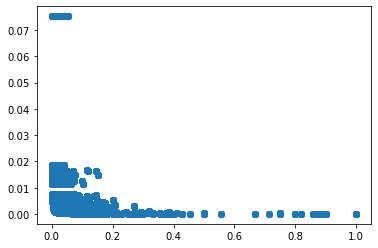

In [48]:
plt.scatter(x= ds.proba_uc_given_ep, y = ds.ep_proba)

In [49]:
#creating variable which shows the dataframe contianing the defined anomailes, anaomalies being with a uc_given_ep proab >0.45 and ep proba < .02
df_= ds[(ds['proba_uc_given_ep'] > 0.45) & (ds['ep_proba'] < 0.02)]
df_

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program,ep_proba,proba_uc_given_ep,id_ep_count
dt,,,,,,,,,,,,,,,
2019-08-21 13:36:24,6-regression/3.4-feature-engineering,467,34.0,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.000022,0.500000,1
2019-08-21 13:36:25,6-regression/3.5-modeling,467,34.0,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.000022,0.500000,1
2019-08-21 13:36:25,6-regression/3.6-evaluation,467,34.0,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.000022,0.500000,1
2019-08-30 05:37:28,misleading1_baseball.jpg,483,34.0,67.11.120.157,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.000011,1.000000,1
2019-08-30 05:37:28,misleading1_fox.jpg,483,34.0,67.11.120.157,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.000011,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20 10:35:15,dataframes,895,137.0,96.8.253.119,137,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,data_science,0.000120,0.818182,9
2021-04-20 10:35:18,dataframes,895,137.0,96.8.253.119,137,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,data_science,0.000120,0.818182,9
2021-04-20 10:35:22,dataframes,895,137.0,96.8.253.119,137,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,data_science,0.000120,0.818182,9


In [50]:
#visually looking at the user_id 698 to investigate as anomally
df_[df_.user_id == 698].tail(30)

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program,ep_proba,proba_uc_given_ep,id_ep_count
dt,,,,,,,,,,,,,,,
2020-11-16 12:43:15,explore,698,59.0,67.11.185.59,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000109,0.800000,8
2020-11-16 12:43:19,prepare,698,59.0,67.11.185.59,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000044,1.000000,4
2020-11-16 12:43:21,prepare,698,59.0,67.11.185.59,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000044,1.000000,4
2020-11-16 12:43:23,regular-expressions,698,59.0,67.11.185.59,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000065,1.000000,6
2020-11-19 14:56:30,model,698,59.0,67.11.185.59,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000054,1.000000,5
2020-11-19 14:56:32,model,698,59.0,67.11.185.59,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000054,1.000000,5
2020-11-19 14:56:33,model,698,59.0,67.11.185.59,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000054,1.000000,5
2020-11-20 18:55:07,DataToAction_v2.jpg,698,59.0,67.10.156.23,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000011,1.000000,1
2020-12-08 17:58:34,distributed-ml/read-jdbc,698,59.0,24.28.148.238,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000044,0.500000,2


In [51]:
df_.endpoint.value_counts()

acquire                             16
html-css                            12
1-fundamentals                       9
3-discrete-probabilistic-methods     9
dataframes                           9
                                    ..
End_to_End_clustering                1
itc-ml                               1
python/handling-duplicate-values     1
capstones                            1
appendix/www.opensecrets.org         1
Name: endpoint, Length: 212, dtype: int64

#### Data Science Program Key Findings:
- Looking into the users associated with potential anomalies it was assumed that 70 would be a viable enpoint count to consider as threshold at which to consider the endpoint count an anomaly. After looking into the user_id it was interpreted as being the first student from the Data Science program who was active but didnt access the curriuclum much.

### Front End

In [52]:
#creating a df which is only the Fep program and filtering down to users who where between the start and stop date
fep = pd.DataFrame(df[df.program_id == 4])
fep = fep[fep.index <= fep.end_date]
fep = fep[fep.index > fep.start_date]

In [53]:
#creating df which is the probability calcualtion for endpoint
ep_df = pd.DataFrame(fep.endpoint.value_counts(dropna=False)/fep.endpoint.count()).reset_index().\
                rename(index=str, columns={'index': 'endpoint', 'endpoint': 'ep_proba'})

In [54]:
#merging the created df to the original for use in future calculations
fep = fep.reset_index().merge(ep_df, on=['endpoint'], how='left').fillna(value=0).set_index('dt')
fep.head()

,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,endpoint,ep_proba
dt,,,,,,,,,,,,,,


#### Front End Program Key Findings:
- Front end program had no users which index was within start and end date

#### Overall Key Findings & Takeaways:
- Full Stack and Front end programs did not have any records which were within the start date and end date of the program. Conditional proabilities was utilizexd to create visuals showing the anaomalies, from there anomalies within the Data Science Program and Web Development were investigated. The main findings was the anomalies appear for a count of 70 or less for Data Science and 30 or less for Web development. So after further investigation into the anomalies It was decided to set 70 as the point at which the endpoint count could be considered an anomally. As the endpoint count gets closer to 1, it should be taken into account that annomaly is potentially an accidential result. Meaning an individual accessed the page by mistake.

## 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [55]:
# reacquire data
df = acquire.get_cohort_curr_data()

In [56]:
# Initial prep
df = prepare.initial_prep(df)

In [57]:
#creating df which has been filtered down to prior 2019 and after 2019 implmentation of the shutoff
df_2019_prior = df[df.start_date < '01-01-2019']
df_2019_prior = df_2019_prior[df_2019_prior.endpoint != '/']
df_2019_after = df[df.start_date >= '01-01-2019']
df_2019_after = df_2019_after[df_2019_after.endpoint != '/']

In [58]:
#brief look into df of 2019 prior
df_2019_prior.endpoint.value_counts()

javascript-i                                              6612
spring                                                    5332
java-iii                                                  5163
html-css                                                  4782
java-ii                                                   4711
                                                          ... 
slides/exceptions                                            1
sql                                                          1
glossary                                                     1
content/appendix/javascript/functions/controllers.html       1
ajax                                                         1
Name: endpoint, Length: 1857, dtype: int64

In [59]:
#creating df which is groupby program id then getting the count of the endpoints
df_2019_after = pd.DataFrame(df_2019_after.groupby(['program_id']).endpoint.value_counts().sort_values(ascending = False)).rename(columns = {'endpoint':'count'}).reset_index()

In [60]:
#looking at the total count per program
df_2019_after.groupby(['program_id'])['endpoint'].count()

program_id
2    744
3    681
Name: endpoint, dtype: int64

In [61]:
#visually looking at the endpoint counts and the program_id associated with them. Will compare this visuallt to a df of 2019 and over programs.
df_2019_after[df_2019_after['count'] < 1000].head(50)

,program_id,endpoint,count
134,2,mysql/relationships,922
135,2,examples/css/media-queries.html,907
136,2,capstone,893
137,2,spring/fundamentals/integration-tests,862
138,3,anomaly-detection/AnomalyDetectionCartoon.jpeg,829
139,2,examples/javascript/defuse-the-bom.html,823
140,3,anomaly-detection/overview,804
141,3,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,754
142,3,10-anomaly-detection/1-overview,751
143,2,examples/css/twitter.html,719


In [62]:
#creating df which is groupby program_id then getting the endpoint counts, will create this to get a visual.
df_prior = pd.DataFrame(df_2019_prior.groupby(['program_id'])['endpoint'].value_counts().sort_values(ascending = False)).rename(columns = {'endpoint':'count'}).reset_index()

In [63]:
#looking at the df visually to compare to the prior df and see where the program_id has changed.
df_prior[df_prior['count'] < 1000].head(50)

,program_id,endpoint,count
94,2,java-iii/passwords,999
95,2,mysql/relationships/indexes,992
96,2,jquery/events/keyboard-events,970
97,2,html-css/css-i/introduction,954
98,2,javascript-i/objects/math,923
99,2,jquery/ajax,909
100,2,mysql/clauses/where,905
101,2,javascript-i/introduction,896
102,2,mysql/intellij,893
103,2,mysql/relationships/sub-queries,885


#### Key Findings & Takeaways:
- The evidence for Web Development being able to access Data Science curriculum and vice versa prior to the restriction being implmented in 2019 is based on the fundamentals and anomally detection lessons. The dataset was split into two DataFrames, one which contained programs endpoint counts prior to 2019 and from 2019 on. Fundamentals and Anomally detection which is available now only within the current Data Science program curriculum can be seen with a program id of 2 meaning that the Web Development (Java) program had access to the lessons.

## 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [64]:
# Reacquire data
df = acquire.get_cohort_curr_data()

In [65]:
# Redo initial_prep
df = prepare.initial_prep(df)

In [66]:
# Question 6 specific prep, before splitting by program
df = explore.q6_prep(df)

In [67]:
# Split into separate DataFrames for each program
df_1, df_2, df_3, df_4 = explore.q6_split(df)

#### Full Stack

In [68]:
# Now let's look at program 1
df_1 = explore.q6_math(df_1)
df_1

,min,max,mean,sum,range,zscore
endpoint,,,,,,
index.html,1,877,126.38,1011,876,10.8338
javascript-i,1,294,66.91,736,293,8.1942
html-css,1,215,49.27,542,214,6.0344
spring,2,222,55.67,501,220,5.4539
java-iii,1,224,53.22,479,223,5.2145
java-i,1,138,40.36,444,137,4.9433
java-ii,1,167,50.44,454,166,4.9423
javascript-ii,2,204,47.67,429,202,4.6701
appendix,1,170,45.44,409,169,4.4525


#### Full Stack Program Key Findings:
- There are 10 lessons, as well as the index, and appendix that grads are continuing to access at a high rate
- It is noteworthy that the level-i lessons tend to be viewed more than their level-i/-ii counterparts

#### Java Program

In [69]:
# Now let's look at program 2
df_2 = explore.q6_math(df_2)
df_2

,min,max,mean,sum,range,zscore
endpoint,,,,,,
javascript-i,6,1817,184.04,4233,1811,13.2490
spring,12,1403,163.96,3771,1391,11.8029
search/search_index.json,1,1349,155.26,3571,1348,11.1770
html-css,3,1284,136.74,3145,1281,9.8436
java-iii,13,1393,133.13,3062,1380,9.5838
java-ii,10,1260,130.00,2990,1250,9.3585
java-i,18,855,116.78,2686,837,8.4070
appendix,9,1288,116.39,2677,1279,8.3788
javascript-ii,9,993,110.96,2552,984,7.9876


#### Java Program Key Findings:
- There are (almost) countless lessons that are being viewed with great frequency after graduation
- Again, the theme of 'basics / fundamentals' is present here
- It is noteworthy that 'java' lessons buck this trend, and the higher levels get accessed more often

#### Data Science Program

In [70]:
# Now let's look at program 3
df_3 = explore.q6_math(df_3)
df_3

,min,max,mean,sum,range,zscore
endpoint,,,,,,
search/search_index.json,149,187,164.33,493,38,8.1461
sql/mysql-overview,27,125,91.67,275,98,4.5439
classification/overview,35,136,89.00,267,101,4.4118
classification/scale_features_or_not.svg,28,96,73.33,220,68,3.6352
anomaly-detection/AnomalyDetectionCartoon.jpeg,14,105,64.33,193,91,3.1891
anomaly-detection/overview,15,104,63.67,191,89,3.1559
fundamentals/AI-ML-DL-timeline.jpg,24,101,63.00,189,77,3.1229
fundamentals/modern-data-scientist.jpg,24,100,62.33,187,76,3.0900
fundamentals/intro-to-data-science,25,96,61.33,184,71,3.0404


#### Data Science Program Key Findings:
- 'basics / fundamentals' again
- Program that utilizes the 'search' feature the most
- SQL is the most accessed lesson

#### Front End Program

In [71]:
# Now let's look at program 4
df_4 = explore.q6_math(df_4)
df_4

,min,max,mean,sum,range,zscore
endpoint,,,,,,


#### Front End Program Key Findings:
- Becasue this program was so short-lived, there is not enough data to find anything meaningful here